In [232]:
import numpy as np
import pandas as pd
import sklearn.preprocessing, sklearn.cluster, sklearn.metrics
import scipy.spatial
import matplotlib.pyplot as plt
import seaborn as sns

# Data description

Data source: https://www.kaggle.com/datasets/subhajitnayak/country-data?resource=download&select=Country-data.csv

|Attribute|Description|
|:-------|:-------|
|country | Name of the country |
|child_mort | Death of children under 5 years of age per 1000 live births |
|exports | Exports of goods and services. Given as %age of the Total GDP |
|health | Total health spending as %age of Total GDP |
|imports | Imports of goods and services. Given as %age of the Total GDP |
|Income | Net income per person |
|Inflation | The measurement of the annual growth rate of the Total GDP |
|life_expec | The average number of years a new born child would live if the current mortality patterns are to rem... |
|total_fer | The number of children that would be born to each woman if the current age-fertility rates remain th... |
|gdpp | The GDP per capita. Calculated as the Total GDP divided by the total population. |

# Data loading

In [233]:
df = pd.read_csv('./country-data.csv')
df

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [234]:
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


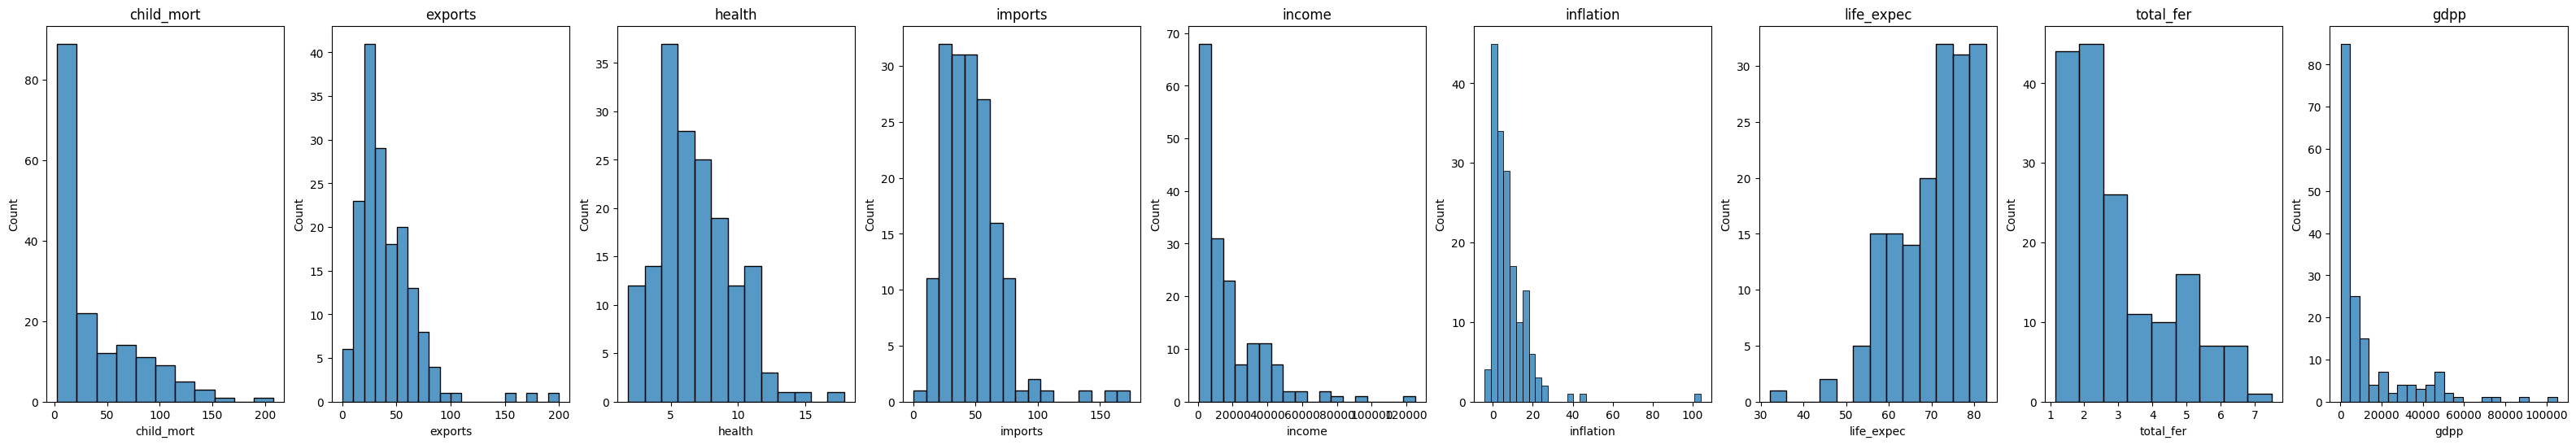

In [235]:
df_only_numeric = df.select_dtypes(np.number)

# Create the subplots
n_rows, n_cols = df_only_numeric.shape
fig, axes = plt.subplots(nrows=1, ncols=n_cols, figsize=(40, 6))
for i, column in enumerate(df_only_numeric):
    sns.histplot(data=df_only_numeric, x=column, ax=axes[i]).set_title(column)

# Data preprocessing
- Why do we need to preprocess the data?

In [236]:
X = df_only_numeric.values

In [304]:
scaler = sklearn.preprocessing.MinMaxScaler()
X_min_max_scaled = scaler.fit_transform(X)
X_min_max_scaled

# Max abs scaler
scaler_max_abs = sklearn.preprocessing.MaxAbsScaler()
X_max_abs_scaled = scaler_max_abs.fit_transform(X)

# Power tranformer scaler
scaler_power_transform = sklearn.preprocessing.PowerTransformer()
X_power_transform_scaled = scaler_power_transform.fit_transform(X)

# Clustering

## KMeans + clustering quality
- https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
- Do you know any technique to determine the best number of clusters?

In [343]:
clustering = sklearn.cluster.KMeans(n_clusters=5)
clustering.fit(X_min_max_scaled)

# Max abs scaler
clustering_second = sklearn.cluster.KMeans(n_clusters=5)
clustering_second.fit(X_max_abs_scaled)

# Power tranformer scaler
clustering_third = sklearn.cluster.KMeans(n_clusters=3)
clustering_third.fit(X_power_transform_scaled)



KMeans(n_clusters=3)

In [306]:
# clustering.labels_
clustering_second.labels_

array([1, 2, 0, 1, 2, 0, 0, 4, 4, 0, 2, 2, 0, 2, 2, 4, 0, 1, 0, 0, 2, 0,
       0, 4, 2, 1, 1, 0, 1, 4, 0, 1, 1, 2, 0, 0, 1, 1, 1, 2, 1, 2, 2, 2,
       4, 0, 0, 0, 0, 1, 1, 2, 0, 4, 4, 0, 1, 2, 4, 1, 4, 0, 0, 1, 1, 0,
       1, 2, 4, 0, 0, 0, 0, 4, 4, 4, 0, 4, 0, 0, 1, 1, 4, 0, 0, 2, 2, 1,
       1, 0, 2, 3, 2, 1, 1, 2, 2, 1, 3, 1, 2, 2, 2, 0, 2, 0, 1, 0, 0, 0,
       4, 4, 1, 1, 4, 0, 1, 2, 0, 0, 0, 2, 2, 4, 2, 0, 1, 0, 0, 1, 2, 2,
       1, 3, 2, 2, 0, 0, 2, 4, 0, 0, 1, 0, 4, 4, 0, 1, 2, 1, 1, 0, 2, 0,
       0, 1, 2, 4, 4, 4, 2, 0, 0, 0, 2, 1, 1])

In [344]:
pd.Series(clustering.labels_).value_counts()
############################################################
pd.Series(clustering_second.labels_).value_counts()
############################################################
pd.Series(clustering_third.labels_).value_counts()

0    64
1    55
2    48
dtype: int64

In [323]:
clustering.inertia_
clustering_second.inertia_
clustering_third.inertia_

598.8685433589204

In [345]:
# sklearn.metrics.silhouette_score(X_min_max_scaled, clustering.labels_)
sklearn.metrics.silhouette_score(X_max_abs_scaled, clustering.labels_)
# sklearn.metrics.silhouette_score(X_power_transform_scaled, clustering.labels_)


0.22961829499357514

## Elbow method

#### Calculate SSE and Silhouette for differenet parameters of clusters $k \in <2, 15>$. Create visualization for both of clustering quality criteria

In [346]:
clustering_scores = []
for k in range(2, 11):
    # clustering = sklearn.cluster.KMeans(n_clusters=k).fit(X_min_max_scaled)
    # clustering = sklearn.cluster.KMeans(n_clusters=k).fit(X_max_abs_scaled)
    clustering = sklearn.cluster.KMeans(n_clusters=k).fit(X_power_transform_scaled)

    clustering_scores.append({
        'k': k,
        'sse': clustering.inertia_,
        # 'silhouette': sklearn.metrics.silhouette_score(X_min_max_scaled, clustering.labels_)
        # 'silhouette': sklearn.metrics.silhouette_score(X_max_abs_scaled, clustering.labels_)
        'silhouette': sklearn.metrics.silhouette_score(X_power_transform_scaled, clustering.labels_)
    })
df_clustering_scores = pd.DataFrame.from_dict(clustering_scores, orient='columns')
df_clustering_scores

,k,sse,silhouette
0,2,903.308344,0.337161
1,3,744.744590,0.245840
2,4,665.018291,0.228725
3,5,599.290591,0.216983
4,6,552.837987,0.224291
5,7,507.791570,0.216460
6,8,468.355731,0.220972
7,9,430.847523,0.231876
8,10,409.812889,0.220083


<AxesSubplot: xlabel='k', ylabel='sse'>

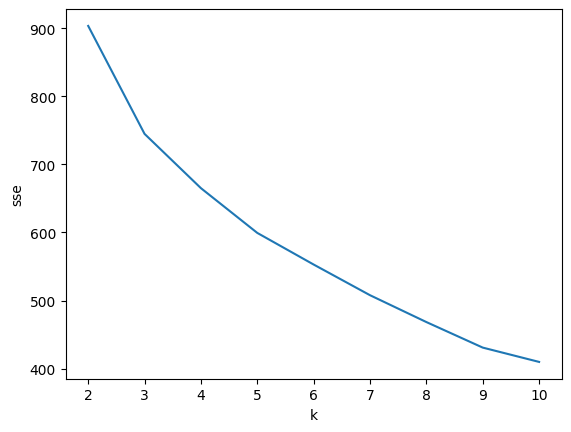

In [347]:
sns.lineplot(data=df_clustering_scores, x='k', y='sse')

<AxesSubplot: xlabel='k', ylabel='silhouette'>

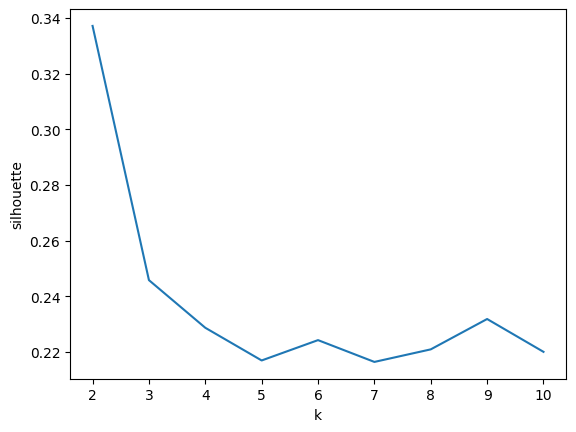

In [348]:
sns.lineplot(data=df_clustering_scores, x='k', y='silhouette')

#### How many cluster do you see ?

#### Can you imagine other quality criteria to use over some real dataset? Do you know difference between external and internal criteria?

## Clustering interpretation

In [350]:
clustering = sklearn.cluster.KMeans(n_clusters=3, random_state=13)
clustering.fit(X_power_transform_scaled)

KMeans(n_clusters=3, random_state=13)

In [356]:
df['cluster_id'] = clustering.labels_

<AxesSubplot: xlabel='cluster_id', ylabel='count'>

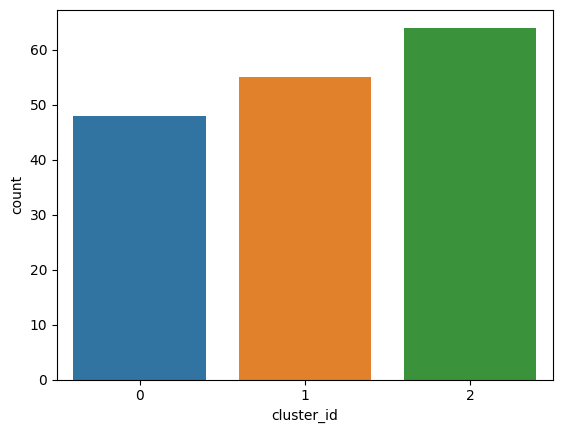

In [357]:
sns.countplot(data=df, x='cluster_id')

## 1. Analyze already detected clusters deeper

#### Use describe() for quick inspection of numeric values in dataset.

In [353]:
with pd.option_context('display.max_columns', None):
    display(df.groupby('cluster_id').describe())

child_mort                                                     \
                count       mean        std   min     25%    50%     75%   
cluster_id                                                                 
0                48.0  89.916667  35.155898  28.1  62.675  88.75  111.00   
1                55.0   6.670909   3.773429   2.6   4.050   5.50    8.60   
2                64.0  26.690625  17.636180   5.5  16.575  20.50   33.35   

                  exports                                                    \
              max   count       mean        std     min   25%   50%     75%   
cluster_id                                                                    
0           208.0    48.0  24.420813  13.827653   0.109  15.2  22.4  30.600   
1            19.7    55.0  55.327273  35.832447  12.400  34.1  46.2  67.750   
2           111.0    64.0  41.406250  18.654153  10.700  26.9  38.8  51.825   

                  health                                                   \
              max  count      mean       std   min     25%    50%     75%   
cluster_id                                                                  
0            62.3   48.0  6.387292  2.862171  1.97  4.5250  5.480   7.715   
1           200.0   55.0  8.547091  2.625774  1.81  7.0350  8.730  10.200   
2            86.9   64.0  5.649062  1.928732  2.46  4.3975  5.315   6.795   

                 imports                                                \
             max   count       mean        std      min     25%    50%   
cluster_id                                                               
0           14.2    48.0  42.684706  20.007544   0.0659  29.475  39.75   
1           17.9    55.0  54.683636  31.234364  13.6000  33.950  48.70   
2           11.7    64.0  43.346875  18.172218  11.8000  27.850  42.55   

                          income                                               \
               75%    max  count          mean           std     min      25%   
cluster_id                                                                      
0           49.375  101.0   48.0   2226.104167   1234.208614   609.0   1390.0   
1           63.250  174.0   55.0  33564.000000  20475.718737  9720.0  19750.0   
2           56.800   81.7   64.0  14223.281250  14323.122504  2790.0   6725.0   

                                       inflation                               \
                50%      75%       max     count       mean        std    min   
cluster_id                                                                      
0            1860.0   2782.5    5900.0      48.0  11.078854  15.206496  0.885   
1           29600.0  41100.0  125000.0      55.0   1.962545   2.871385 -4.210   
2            9925.0  16050.0   80600.0      64.0  10.310016   8.396944  0.480   

                                        life_expec                             \
               25%   50%     75%    max      count       mean       std   min   
cluster_id                                                                      
0           3.8525  7.39  12.875  104.0       48.0  60.310417  6.927228  32.1   
1           0.4180  1.40   2.875   12.5       55.0  78.610909  2.877542  73.1   
2           4.3875  8.09  15.150   45.9       64.0  71.317188  5.318388  54.3   

                                        total_fer                            \
               25%    50%     75%   max     count      mean       std   min   
cluster_id                                                                    
0           57.175  60.75  65.425  71.1      48.0  4.823958  1.220613  2.33   
1           76.350  79.80  80.800  82.8      55.0  1.729636  0.362501  1.15   
2           69.075  72.30  75.175  78.2      64.0  2.587969  0.839934  1.27   

                                         gdpp                              \
               25%    50%     75%   max count          mean           std   
cluster_id                                                                  
0   

<AxesSubplot: xlabel='cluster_id', ylabel='income'>

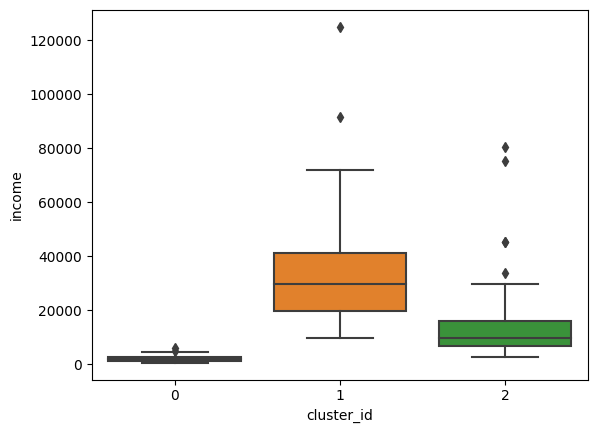

In [354]:
sns.boxplot(data=df, y='income', x='cluster_id')

#### Are there any differences attributes for different clusters?
Clusters with id 1 and 3 contain countries with lower income. High income countries are mostly placed in small cluster with cluster_id 0, other countries with relative high income are in group 2.

#### Continue with description of detected clusters

## Task 1

#### Visualisation of child_mort attribute for each cluster
____________________________
- The number of death of children under 5 years of age per 1000 live births was highest in cluster with id 1
- In the cluster with id 0 and 1, was child_mort almost zero
- The country with the highest number of child_mort is in the cluster with id 1

<AxesSubplot: xlabel='cluster_id', ylabel='child_mort'>

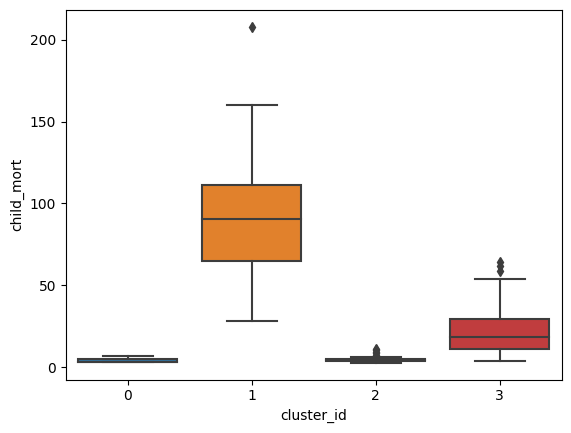

In [254]:
sns.boxplot(data=df, y='child_mort', x='cluster_id')

#### Visualisation of imports and exports
____________________________
- It seems that clusters with high number of exports has high numbers of imports too
- The cluster with the id 0 has the highest number of exports and imports
- The cluster with the if 2 has lower number of imports than 3, but higher number of exports than 3

<AxesSubplot: xlabel='cluster_id', ylabel='imports'>

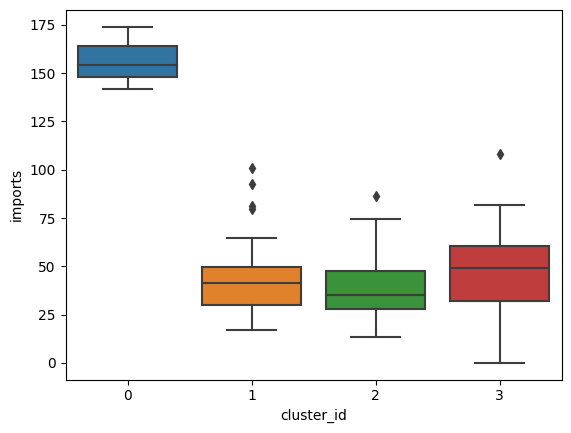

In [279]:
sns.boxplot(data=df, y='imports', x='cluster_id')

<AxesSubplot: xlabel='cluster_id', ylabel='exports'>

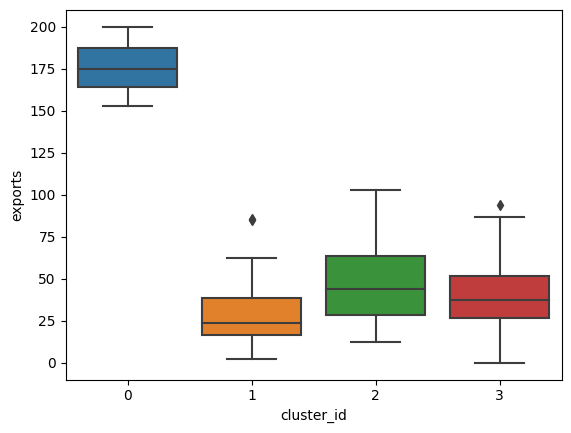

In [281]:
sns.boxplot(data=df, y='exports', x='cluster_id')

#### Visualisation of inflation
____________________________
- It seems that clusters with id 0 and 2 have the lowest inflation
- Highest inflation is in the cluster with id 1 and 3

<AxesSubplot: xlabel='cluster_id', ylabel='inflation'>

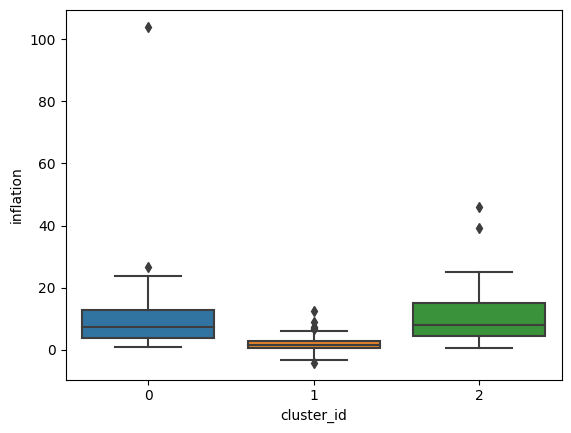

In [363]:
sns.boxplot(data=df, y='inflation', x='cluster_id')

### Final result
- It seems that cluster with id 0 contains the most developed countries
- Countries in cluster 1 have the highest mortality and lowest income in general, there will be lower standard of living maybe
- Clusters are mainly made by standard of life, at least in my opinion
_____________________


## Task 2, 3, 4

#### Count of countires for each cluster

In [362]:
pd.Series(clustering.labels_).value_counts()

2    64
1    55
0    48
dtype: int64

#### Visualisation of income
____________________________
- It seems that cluster with id 0 has strongly lowest income rate

<AxesSubplot: xlabel='cluster_id', ylabel='income'>

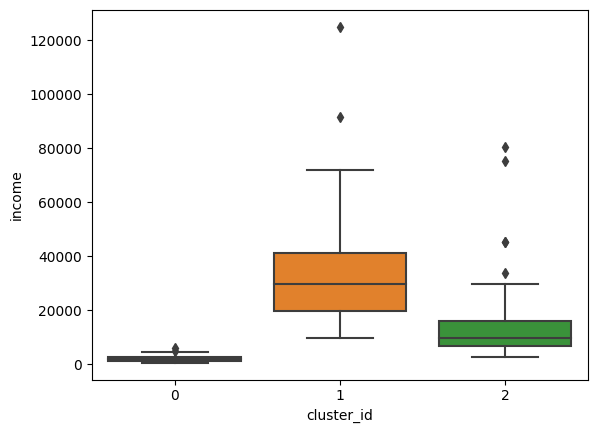

In [368]:
sns.boxplot(data=df, y='income', x='cluster_id')

#### Visualisation of child_mort
____________________________
- It seems that cluster with id 0 has the highest child_mort, the lowest one is cluster with id 1 and in the middle is 2

<AxesSubplot: xlabel='cluster_id', ylabel='child_mort'>

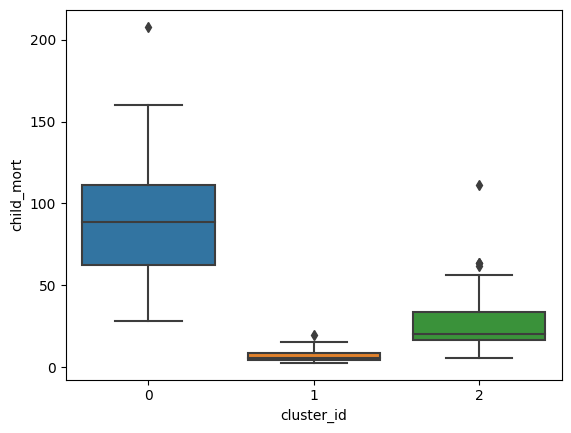

In [370]:
sns.boxplot(data=df, y='child_mort', x='cluster_id')

#### Visualisation of inflation
____________________________
- Cluster 1 has the lowest inflation
- Cluster 0 and 2 are on the same level

<AxesSubplot: xlabel='cluster_id', ylabel='inflation'>

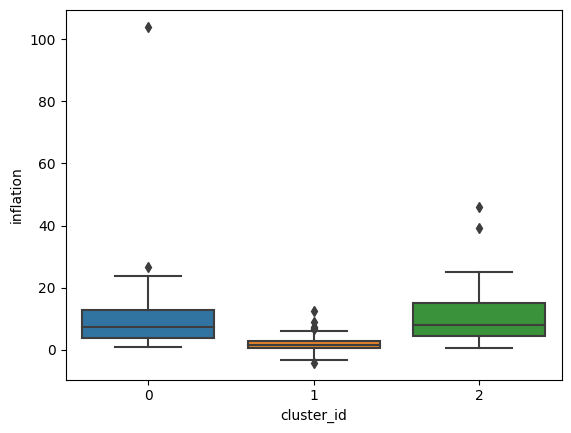

In [371]:
sns.boxplot(data=df, y='inflation', x='cluster_id')


### Final result
- It seems that cluster with id 1 contains the most developed countries
- In the cluster with id 0 and 2 is similar inflation, but really different child_mort and income
_____________________


## DBSCAN + distance analysis
- https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html
- https://www.kdnuggets.com/2020/04/dbscan-clustering-algorithm-machine-learning.html

In [213]:
clustering = sklearn.cluster.DBSCAN()
clustering.fit(X_min_max_scaled)

DBSCAN()

In [214]:
pd.Series(clustering.labels_).value_counts()

 0    161
-1      6
dtype: int64

What does the number -1 means?
#### Find better parameters *eps* and *min_pts* and visualize you result

In [215]:
clustering = sklearn.cluster.DBSCAN(eps=0.2, min_samples=5).fit(X_min_max_scaled)
pd.Series(clustering.labels_).value_counts()

 1    75
-1    54
 0    21
 2    17
dtype: int64

#### Lets get insight into distances in our dataset and be able to configure our parameters for DBSCAN

In [216]:
distance_matrix = scipy.spatial.distance_matrix(X_min_max_scaled, X_min_max_scaled)
distance_matrix

array([[0.        , 0.85938446, 0.74311097, ..., 0.8546914 , 0.40426303,
        0.22412638],
       [0.85938446, 0.        , 0.2957055 , ..., 0.31085967, 0.58498839,
        0.84241764],
       [0.74311097, 0.2957055 , 0.        , ..., 0.41013299, 0.38283615,
        0.69477761],
       ...,
       [0.8546914 , 0.31085967, 0.41013299, ..., 0.        , 0.59790897,
        0.81790284],
       [0.40426303, 0.58498839, 0.38283615, ..., 0.59790897, 0.        ,
        0.36781892],
       [0.22412638, 0.84241764, 0.69477761, ..., 0.81790284, 0.36781892,
        0.        ]])

<AxesSubplot: ylabel='Count'>

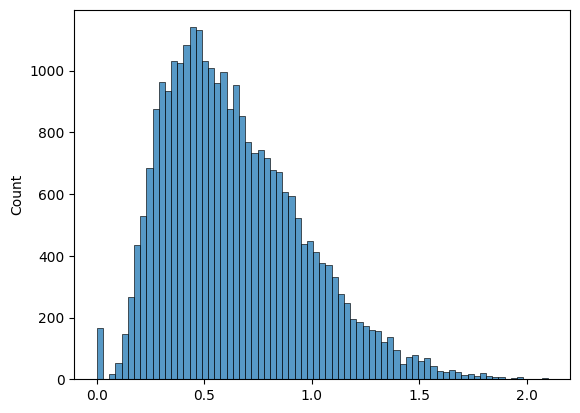

In [217]:
sns.histplot(distance_matrix.flatten())

In [218]:
distance_matrix = scipy.spatial.distance_matrix(X_min_max_scaled, X_min_max_scaled)
distance_matrix.sort(axis=1)
distance_matrix

array([[0.        , 0.14842545, 0.15137223, ..., 1.535181  , 1.73891415,
        1.83776206],
       [0.        , 0.1097279 , 0.11452457, ..., 1.31412931, 1.3148987 ,
        1.48628607],
       [0.        , 0.15065842, 0.1712165 , ..., 1.28222406, 1.35681504,
        1.52301869],
       ...,
       [0.        , 0.18710912, 0.21453506, ..., 1.26599787, 1.27534801,
        1.3823712 ],
       [0.        , 0.17442501, 0.17785416, ..., 1.32168729, 1.53925858,
        1.67687246],
       [0.        , 0.10082188, 0.15766287, ..., 1.47501506, 1.68334477,
        1.79717218]])

<AxesSubplot: ylabel='Count'>

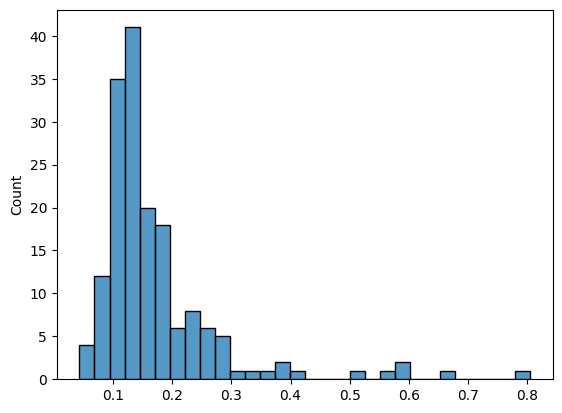

In [219]:
sns.histplot(distance_matrix[:, 1])

<AxesSubplot: ylabel='Count'>

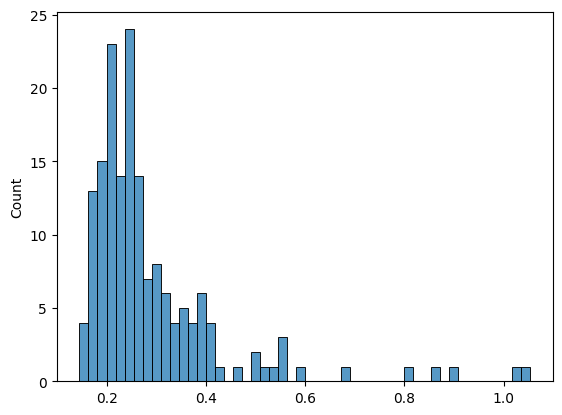

In [220]:
sns.histplot(distance_matrix[:, 10], bins=50)

#### What can we notice in previous visualizations?

In [221]:
clustering = sklearn.cluster.DBSCAN(eps=0.25, min_samples=10).fit(X_min_max_scaled)
pd.Series(clustering.labels_).value_counts()

 1    102
-1     38
 0     27
dtype: int64

#### Description of clusters (and probably noise points too)

In [222]:
df['cluster_id'] = clustering.labels_

In [223]:
df[df.cluster_id == -1].country.values

array(['Angola', 'Botswana', 'Brunei', 'Burundi',
       'Central African Republic', 'Chad', 'Congo, Rep.',
       'Equatorial Guinea', 'Gabon', 'Haiti', 'Iraq', 'Ireland',
       'Kiribati', 'Kuwait', 'Lesotho', 'Liberia', 'Luxembourg', 'Malta',
       'Micronesia, Fed. Sts.', 'Mongolia', 'Niger', 'Nigeria', 'Norway',
       'Oman', 'Pakistan', 'Qatar', 'Rwanda', 'Saudi Arabia',
       'Seychelles', 'Sierra Leone', 'Singapore', 'Solomon Islands',
       'South Africa', 'Timor-Leste', 'Turkmenistan',
       'United Arab Emirates', 'United States', 'Venezuela'], dtype=object)

In [224]:
df[df.cluster_id == 0].country.values

array(['Afghanistan', 'Benin', 'Burkina Faso', 'Cameroon', 'Comoros',
       'Congo, Dem. Rep.', "Cote d'Ivoire", 'Eritrea', 'Gambia', 'Ghana',
       'Guinea', 'Guinea-Bissau', 'Kenya', 'Lao', 'Madagascar', 'Malawi',
       'Mali', 'Mauritania', 'Mozambique', 'Senegal', 'Sudan',
       'Tajikistan', 'Tanzania', 'Togo', 'Uganda', 'Yemen', 'Zambia'],
      dtype=object)

In [225]:
df[df.cluster_id == 1].country.values

array(['Albania', 'Algeria', 'Antigua and Barbuda', 'Argentina',
       'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas',
       'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium',
       'Belize', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Brazil',
       'Bulgaria', 'Cambodia', 'Canada', 'Cape Verde', 'Chile', 'China',
       'Colombia', 'Costa Rica', 'Croatia', 'Cyprus', 'Czech Republic',
       'Denmark', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador',
       'Estonia', 'Fiji', 'Finland', 'France', 'Georgia', 'Germany',
       'Greece', 'Grenada', 'Guatemala', 'Guyana', 'Hungary', 'Iceland',
       'India', 'Indonesia', 'Iran', 'Israel', 'Italy', 'Jamaica',
       'Japan', 'Jordan', 'Kazakhstan', 'Kyrgyz Republic', 'Latvia',
       'Lebanon', 'Libya', 'Lithuania', 'Macedonia, FYR', 'Malaysia',
       'Maldives', 'Mauritius', 'Moldova', 'Montenegro', 'Morocco',
       'Myanmar', 'Namibia', 'Nepal', 'Netherlands', 'New Zealand',
       'Panama', 'Paragu

<AxesSubplot: xlabel='cluster_id', ylabel='income'>

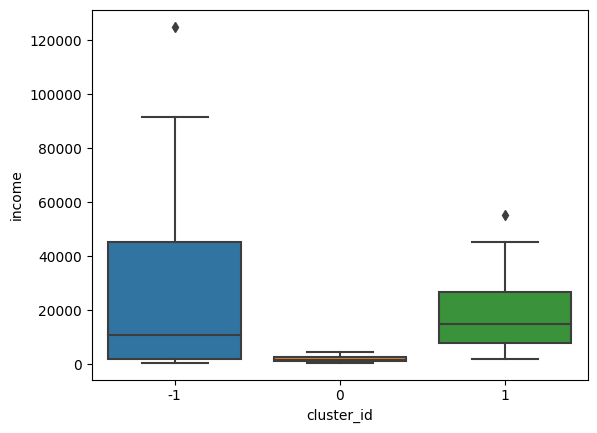

In [226]:
sns.boxplot(data=df, y='income', x='cluster_id')

### How would you treat non-numerical attributes?

### For more info about Sklearn clustering, take a look into documentation https://scikit-learn.org/stable/modules/clustering.html#clustering

# Task (2p)

Continue with clustering analysis:
1. Let's add more information for already detected clusters (code above). Choose one of already used method (k-means or DBSCAN) and add more description for clusters.

MinMax scaling is not the only best possibility for scaling of numerical attributes.

2. Take a look into documentation (https://scikit-learn.org/stable/modules/classes.html?highlight=preprocessing#module-sklearn.preprocessing) and choose other method for scaling your features.

3. Apply clustering method of your choice (https://scikit-learn.org/stable/modules/clustering.html) for differently scaled data.

4. Describe detected clusters.

As a bonus, it may be interesting to combine differently scaled features - e.g. feature1 scaled using MinMax, feature2 scaled using PowerTransform etc. And used this dataset for clustering.